In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing all libraries used here
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
#stock of which future prices are predicted
stock='SRTRANSFIN'

In [4]:
#loading data and creating features
raw_data = pd.read_csv("/content/drive/MyDrive/419_project/FINAL_FROM_DF.csv")
x=pd.to_datetime(raw_data['TIMESTAMP'])
raw_data['DATE']=x.dt.day
raw_data['MONTH']=x.dt.month
raw_data['YEAR']=x.dt.year
del x

x_stock = raw_data[raw_data.SYMBOL==stock][['SERIES','TIMESTAMP','DATE','MONTH','YEAR']]
x_stock=x_stock.reset_index()
x_stock=x_stock.drop(labels=['index'],axis=1)

temp=x_stock
t = temp.groupby("SERIES").size().sort_values().index
dic=dict()
for k in range(len(t)):
  dic[t[k]]=k+1
del temp,t
dic['nan']=0
print("series: ",dic)
temp=list(x_stock['SERIES'])
temp2=[]
for p in range(len(temp)):
  try:
    temp2.append(dic[str(temp[p])])
  except:
    print(temp[p])
temp=pd.DataFrame(temp2,columns=['SER'])

x_stock['N_SERIES']=temp['SER']
print(x_stock.columns)
size=len(x_stock)

series:  {'NB': 1, 'NG': 2, 'NN': 3, 'Y5': 4, 'NM': 5, 'YD': 6, 'NI': 7, 'Y4': 8, 'NY': 9, 'NV': 10, 'Y6': 11, 'YC': 12, 'NL': 13, 'Y1': 14, 'YG': 15, 'Y2': 16, 'YA': 17, 'NF': 18, 'Y8': 19, 'N9': 20, 'Y7': 21, 'Y3': 22, 'NZ': 23, 'YB': 24, 'NU': 25, 'NS': 26, 'Y9': 27, 'NX': 28, 'NW': 29, 'EQ': 30, 'nan': 0}
Index(['SERIES', 'TIMESTAMP', 'DATE', 'MONTH', 'YEAR', 'N_SERIES'], dtype='object')


Linear Regression

In [ ]:
#linear regression class
class linearRegression(torch.nn.Module):
  def __init__(self,input_size,output_size):
    super(linearRegression,self).__init__()
    self.linear=torch.nn.Linear(input_size,output_size)
  def forward(self,x):
    out=self.linear(x)
    return out

In [ ]:
#initializing model and other parameters
inputDim=4
outputDim=1
learningRate=1e-2
epochs=100
model=linearRegression(inputDim,outputDim)
loss_function=torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learningRate)

In [ ]:
#training model in batch of 20 samples per iteration for each epoch
x_train=torch.tensor(x_stock.drop(labels=['SERIES','TIMESTAMP'],axis=1).to_numpy()).to(torch.float)
y_train=torch.tensor(raw_data[raw_data.SYMBOL==stock][['CLOSE']].to_numpy()).to(torch.float)
for epoch in range(epochs):
  for k in range(0,size,20):
    x=x_train[k:k+20]
    y=y_train[k:k+20]
    optimizer.zero_grad()
    output=model(x)
    loss=loss_function(output,y)
    loss.backward()
    optimizer.step()
  print('epoch {}, loss {}'.format(epoch,loss.item()))

epoch 0, loss 111565.8125
epoch 1, loss 110950.5625
epoch 2, loss 110050.21875
epoch 3, loss 108902.8359375
epoch 4, loss 107601.3359375
epoch 5, loss 106239.2421875
epoch 6, loss 104881.3671875
epoch 7, loss 103564.3203125
epoch 8, loss 102308.1953125
epoch 9, loss 101124.0703125
epoch 10, loss 100017.484375
epoch 11, loss 98990.0
epoch 12, loss 98040.5390625
epoch 13, loss 97166.234375
epoch 14, loss 96363.171875
epoch 15, loss 95626.90625
epoch 16, loss 94952.7578125
epoch 17, loss 94336.03125
epoch 18, loss 93772.1171875
epoch 19, loss 93256.71875
epoch 20, loss 92785.7109375
epoch 21, loss 92355.1875
epoch 22, loss 91961.609375
epoch 23, loss 91601.71875
epoch 24, loss 91272.453125
epoch 25, loss 90971.09375
epoch 26, loss 90695.1640625
epoch 27, loss 90442.375
epoch 28, loss 90210.625
epoch 29, loss 89998.0390625
epoch 30, loss 89802.96875
epoch 31, loss 89623.8125
epoch 32, loss 89459.2109375
epoch 33, loss 89307.8359375
epoch 34, loss 89168.59375
epoch 35, loss 89040.40625
epoc

In [ ]:
x_t_eq = x_stock[x_stock.SERIES=='EQ']
x_t_eq=torch.tensor(x_t_eq.drop(labels=['SERIES','TIMESTAMP'],axis=1).to_numpy()).to(torch.float)
x_t_nw = x_stock[x_stock.SERIES=='NW']
x_t_nw=torch.tensor(x_t_nw.drop(labels=['SERIES','TIMESTAMP'],axis=1).to_numpy()).to(torch.float)
t1 = model(x_t_eq)
y_eq=[]
for k in t1:
  y_eq.append(k.item())
y_eq=pd.DataFrame(y_eq,columns=['CLOSE'])
t1=model(x_t_nw)
y_nw=[]
for k in t1:
  y_nw.append(k.item())
y_nw=pd.DataFrame(y_nw,columns=['CLOSE'])

In [ ]:
# torch.save(model.state_dict,"/content/drive/MyDrive/419_project/model")


In [ ]:
#future 1 month prediction
xf_eq1=[]
xf_eq2=[]
xf_nw1=[]
xf_nw2=[]
for k in range(1,31):   #creating 1 month features (January-2018) 
  xf_eq1.append([k,1,2018,dic['EQ']])
  xf_nw1.append([k,1,2018,dic['NW']])
  if k<10:
    xf_eq2.append("2018-01-0"+str(k))
    xf_nw2.append("2018-01-0"+str(k))
  else:
    xf_eq2.append("2018-01-"+str(k))
    xf_nw2.append("2018-01-"+str(k))

xf_eq1=torch.tensor(xf_eq1).to(torch.float)
xf_nw1=torch.tensor(xf_nw1).to(torch.float)
xf_eq2=pd.to_datetime(pd.DataFrame(xf_eq2,columns=['TIMESTAMP']).stack()).unstack()
xf_nw2=pd.to_datetime(pd.DataFrame(xf_nw2,columns=['TIMESTAMP']).stack()).unstack()
pred_eq=model(xf_eq1) #prediction
pred_nw=model(xf_nw1)
yf_eq=[]
yf_nw=[]
for y in pred_eq:
  yf_eq.append(y.item())
for y in pred_nw:
  yf_nw.append(y.item())
yf_eq=pd.DataFrame(yf_eq,columns=['CLOSE'])
yf_nw=pd.DataFrame(yf_nw,columns=['CLOSE'])

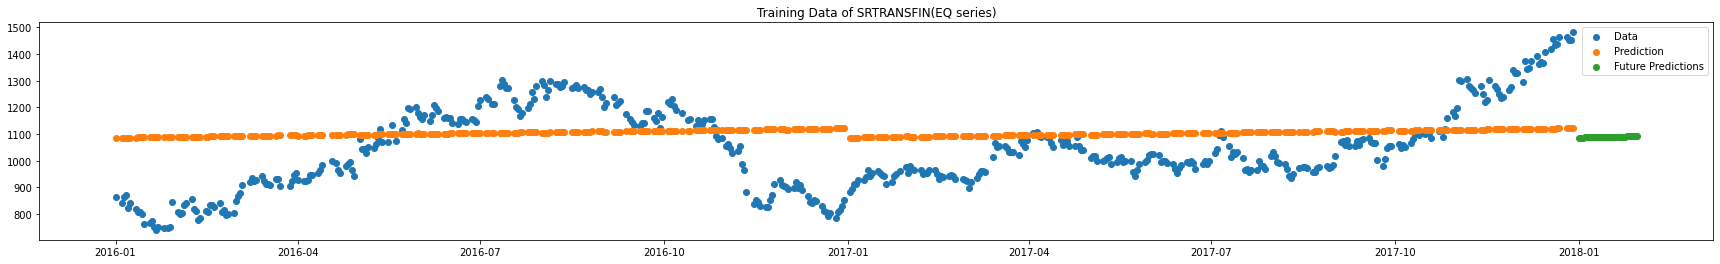

In [ ]:
#plotting EQ series data
x_eq = x_stock[x_stock.SERIES=='EQ']['TIMESTAMP']
x_eq = pd.to_datetime(x_eq)
y_eq = y_eq
y_eq_a = raw_data[raw_data.SYMBOL==stock]
y_eq_a = y_eq_a[y_eq_a.SERIES=='EQ']['CLOSE']

f=plt.figure()
f.set_figwidth(30)
plt.scatter(x_eq,y_eq_a)
plt.scatter(x_eq,y_eq)
plt.scatter(xf_eq2,yf_eq)
plt.title("Training Data of SRTRANSFIN(EQ series)")
plt.legend(['Data','Prediction','Future Predictions'])
plt.show()

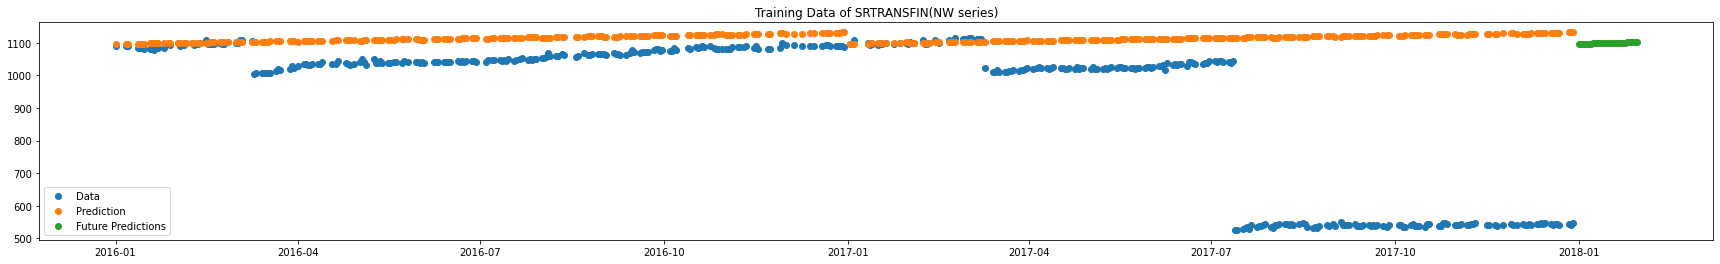

In [ ]:
#plotting NW series data
x_nw = x_stock[x_stock.SERIES=='NW']['TIMESTAMP']
x_nw = pd.to_datetime(x_nw)
y_nw = y_nw
y_nw_a = raw_data[raw_data.SYMBOL==stock]
y_nw_a = y_nw_a[y_nw_a.SERIES=='NW']['CLOSE']

f=plt.figure()
f.set_figwidth(30)
plt.scatter(x_nw,y_nw_a)
plt.scatter(x_nw,y_nw)
plt.scatter(xf_nw2,yf_nw)
plt.title("Training Data of SRTRANSFIN(NW series)")
plt.legend(['Data','Prediction','Future Predictions'])
plt.show()

In [ ]:
###LSTM###

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/419_project/FINAL_FROM_DF.csv")
stock='SRTRANSFIN'
data=data[data.SYMBOL==stock]
x=pd.DataFrame(pd.to_datetime(data['TIMESTAMP']),columns=['TIMESTAMP'])
data=data.drop(labels=["TIMESTAMP"],axis=1)
data=data.join(x).sort_values('TIMESTAMP').reset_index().drop(labels=['index'],axis=1)
s=len(data)
train=data[:int(0.7*s)]
test=data[int(0.7*s):]

In [ ]:
x_train = train.iloc[:, 7:8].values
y_train = train.iloc[:, 5:6].values
x_test = test.iloc[:, 7:8].values
y_test = test.iloc[:, 5:6].values


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
scaler.fit(x_test)
x_test = scaler.transform(x_test)
scaler.fit(y_test)
y_test = scaler.transform(y_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)


In [ ]:
x_t = []
y_t = []
for i in range(60, 3296):
  x_t.append(x_train[i-60:i,0])
  y_t.append(y_train[i,0])

x_t = np.array(x_t)
y_t = np.array(y_t)

In [ ]:
x_t = np.reshape(x_t, (x_t.shape[0], x_t.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
rg = Sequential()
rg.add(LSTM(units = 50, return_sequences=True, input_shape = (x_t.shape[1],1)))
rg.add(Dropout(0.2))

rg.add(LSTM(units = 50, return_sequences= True))
rg.add(Dropout(0.2))

rg.add(LSTM(units = 50, return_sequences= True))
rg.add(Dropout(0.2))

rg.add(LSTM(units = 50))
rg.add(Dropout(0.2))

rg.add(Dense(units=1))

In [ ]:
rg.compile(optimizer= 'adam', loss = 'mean_squared_error')
rg.fit(x_t, y_t, epochs = 100, batch_size = 32)

In [ ]:
x_tt = []
for i in range(60,1413):
  x_tt.append(x_test[i-60:i, 0])
x_tt = np.array(x_tt)
x_tt  = np.reshape(x_tt, (x_tt.shape[0], x_tt.shape[1],1))

In [ ]:
y_prediction5 = rg.predict(x_tt)


In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual stock price')
plt.plot(y_prediction5, color = 'blue', label = 'Predicted stock price')
plt.title('Comparison between actual and predicted stock prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

In [ ]:
y_test = y_test[60:]

In [ ]:
np.sqrt(mean_squared_error(y_test, y_prediction5))

In [ ]:
###Random Forest###

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/419_project/FINAL_FROM_DF.csv")
x=pd.to_datetime(df['TIMESTAMP'])
df['DATE']=x.dt.day
df['MONTH']=x.dt.month
df['YEAR']=x.dt.year
del x

In [ ]:
stock='SRTRANSFIN'

In [ ]:
x_stock = df[df.SYMBOL==stock][['DATE','MONTH','YEAR']]
x_stock=torch.tensor(x_stock.to_numpy()).to(torch.float)
y_stock = df[df.SYMBOL==stock]['CLOSE']
y_stock=torch.tensor(y_stock.to_numpy()).to(torch.float)

In [ ]:
model = RandomForestRegressor(n_jobs=-1)


In [ ]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    y_prediction4  = model.predict(x_test)
    scores.append(model.score(x_test, y_prediction4))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_prediction4))

In [ ]:
plt.scatter(y_test, y_prediction4)
plt.xlabel("Actual Prices")
plt.ylabel(" Estimated Prices")
plt.title("Comparison between actual and estimated prices")
plt.show()

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual stock price')
plt.plot(y_prediction4, color = 'blue', label = 'Predicted stock price')
plt.title('Comparison between actual and predicted stock prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

In [ ]:
###ANN####

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/419_project/FINAL_FROM_DF.csv")
x=pd.to_datetime(df['TIMESTAMP'])
df['DATE']=x.dt.day
df['MONTH']=x.dt.month
df['YEAR']=x.dt.year
del x

In [ ]:
stock='SRTRANSFIN'

In [ ]:
x_stock = df[df.SYMBOL==stock][['DATE','MONTH','YEAR']]
x_stock=torch.tensor(x_stock.to_numpy()).to(torch.float)
y_stock = df[df.SYMBOL==stock]['CLOSE']
y_stock=torch.tensor(y_stock.to_numpy()).to(torch.float)

In [ ]:
model = Sequential()
model.add(Dense(256,activation='relu', input_dim = 3))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

In [ ]:
x_stock = df[df.SYMBOL==stock][['DATE','MONTH','YEAR']]
y_stock = df[df.SYMBOL==stock]['CLOSE']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_stock, y_stock, test_size= 0.33 , random_state=42)

In [ ]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

epochs_hist=model.fit(x_train, y_train, epochs=100, batch_size= 100, verbose=1)

In [ ]:
y_prediction3 = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, y_prediction3))

In [ ]:
plt.scatter(y_test, y_prediction3)
plt.xlabel("Actual Prices")
plt.ylabel(" Estimated Prices")
plt.title("Comparison between actual and estimated prices")
plt.show()

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual stock price')
plt.plot(y_prediction3, color = 'blue', label = 'Predicted stock price')
plt.title('Comparison between actual and predicted stock prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()